# CAS Data Engineering FHNW - FS2024
## Data Wrangling Module - Author F.Burnelli

1. Visualisation:


- run_pipeline()
  - extract_data(df)
  - missings_columns(df)
  - integrity_duplicates(df)
  - integrity_data_types(df)
  - consistency_business_rules(df)
  - working_with_text(df)
  - enrichment(df)  
  - data_protection(df)  
  - persist_data

### Dataset: LendingClub

Ein Kaggle-Datensatz, der auch in anderen CAS-Modulen verwendet werden wird.<br>
1. Dataset link: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans
2. Schema infos: https://www.openintro.org/data/index.php?data=loans_full_schema
3. Context: Loan data for all loans issued through the time period stated in US area.
4. Content:Training set (data from 2007 till 2015) and test set (data from 2016 till 2017).
### NOTE HERE WE USE A SAMPLE: lc_loan_sample.csv

other options: copy the requirements.txt to /root/work/ and run

pip install -r requirements.txt

Using Conda:
```
conda create --name cas_de python=3.9
conda install --file requirements.txt
python -m ipykernel install --user --name=cas_de
```
Using pip:
```
pip install -r requirements.txt
```
in Deepnote : copy the requirements.txt to /root/work/ and run pip install -r requirements.txt

In [2]:
import sys
import warnings

# Wrangling
import pandas as pd
import numpy as np


### Vis
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

## Extract Data

In [4]:
df = pd.read_csv("lc_loan_sample.csv",low_memory = False)
            

In [5]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1069453,1303701,11000.0,11000.0,11000.0,36 months,6.62,337.75,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1067874,1302235,6000.0,6000.0,6000.0,60 months,12.69,135.57,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1057633,1289398,8450.0,8450.0,8425.0,60 months,16.77,208.97,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(17747, 74)

In [8]:
sns.set_style('darkgrid',{'axes.grid' : False})


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17747 entries, 0 to 17746
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17747 non-null  int64  
 1   member_id                    17747 non-null  int64  
 2   loan_amnt                    17747 non-null  float64
 3   funded_amnt                  17747 non-null  float64
 4   funded_amnt_inv              17747 non-null  float64
 5   term                         17747 non-null  object 
 6   int_rate                     17747 non-null  float64
 7   installment                  17747 non-null  float64
 8   grade                        17747 non-null  object 
 9   sub_grade                    17747 non-null  object 
 10  emp_title                    16740 non-null  object 
 11  emp_length                   16888 non-null  object 
 12  home_ownership               17747 non-null  object 
 13  annual_inc      

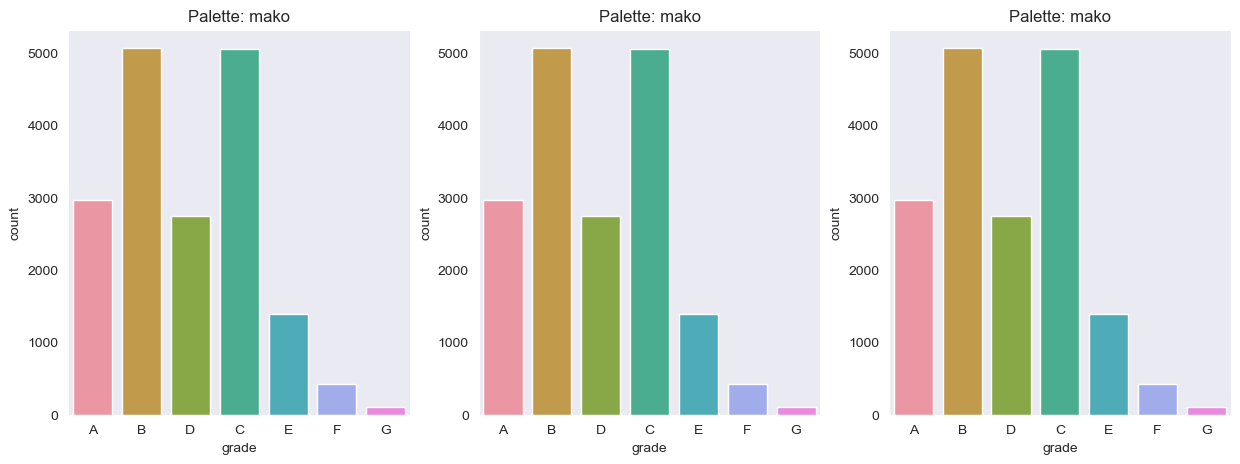

In [106]:
palettes = ['RdBu', 'Blues', 'colorblind']
palettes = ['mako', 'mako', 'mako']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, p in enumerate(palettes):
    sns.set_palette(p)
    sns.countplot(df,x='grade', ax=axes[i])
    axes[i].set_title(f'Palette: {p}')
    

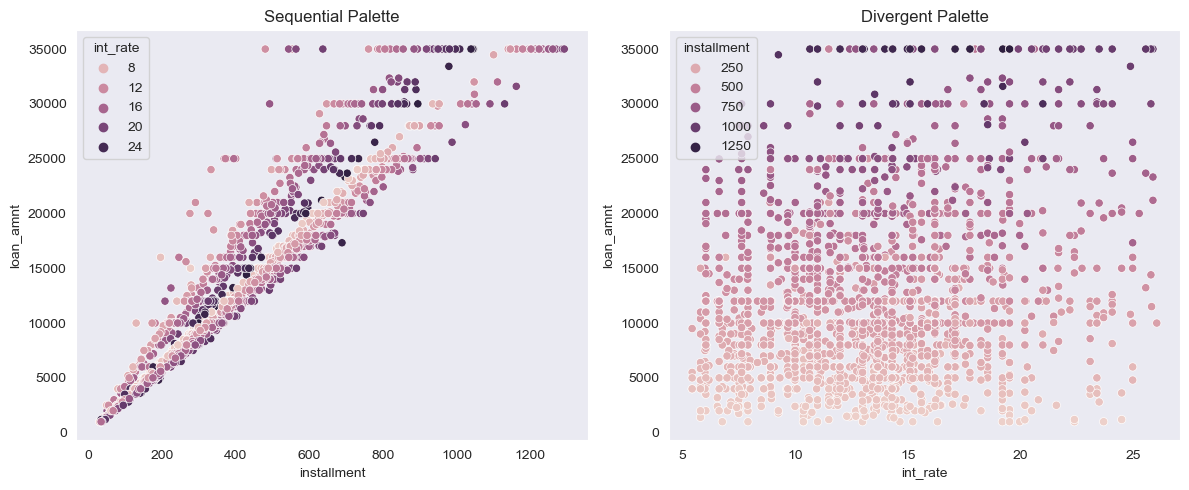

In [116]:
#import matplotlib.pyplot as plt
#import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Sequential palette example
sns.set_palette("Blues")
sns.scatterplot(x='installment', y='loan_amnt', hue='int_rate', data=df.head(2000), ax=axes[0])
axes[0].set_title('Sequential Palette')
# Divergent palette example
sns.set_palette("RdBu")
sns.scatterplot(x='int_rate',y="loan_amnt", hue="installment",data=df.head(2000), ax=axes[1])
axes[1].set_title('Divergent Palette')
plt.tight_layout()

plt.show()


In [11]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

# Categorical: grades

[Text(0.5, 1.0, 'Grades Count')]

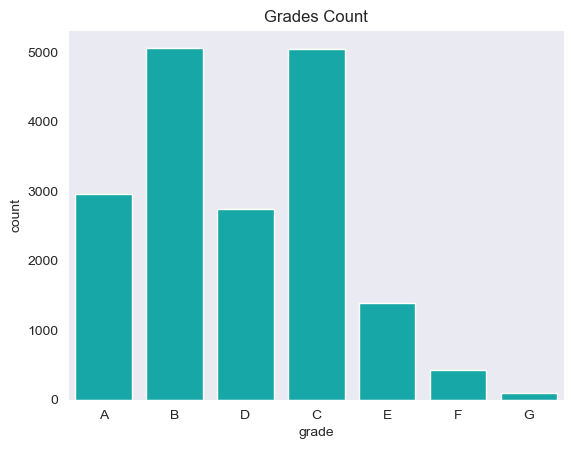

In [11]:
sns.countplot(data=df, x="grade", color="c").set(title='Grades Count')

# Grades and Terms

[Text(0.5, 1.0, 'Grades Count')]

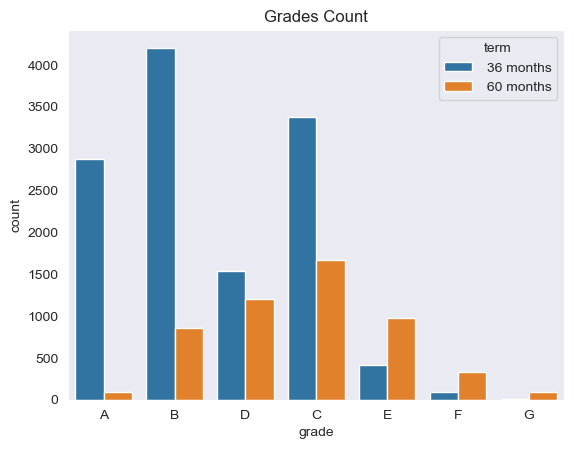

In [14]:
sns.countplot(data=df, x="grade", hue="term").set(title='Grades Count')

# Boxplot (CATPLOT)

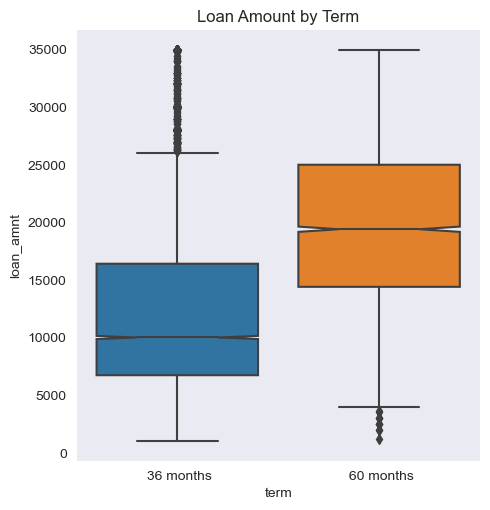

In [12]:
sns.catplot(data=df,x="term",y="loan_amnt",kind="box",
           whis=1,
           notch=True).set(title='Loan Amount by Term')

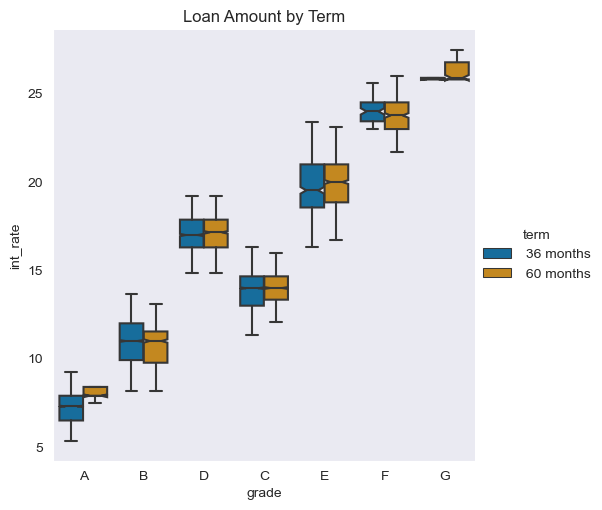

In [94]:
sns.catplot(data=df,x="grade",y="int_rate",hue="term",kind="box",
           whis=1,
           notch=True,
           sym="" #outliars
           ).set(title='Loan Amount by Term')

# Histograms

[Text(0.5, 1.0, 'Loans Amount 10')]

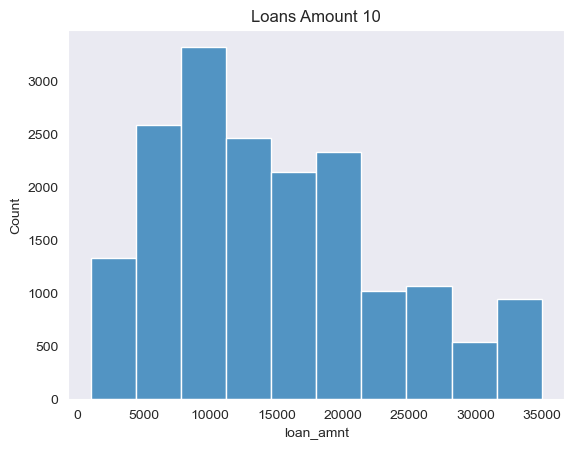

In [35]:
bins = 10
sns.histplot(data=df,x="loan_amnt",bins=bins).set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount [5000, 10000, 15000, 20000, 25000, 100000]')]

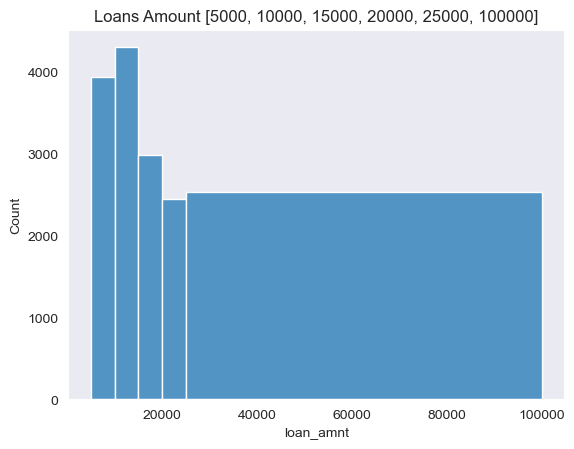

In [42]:
bins = [5000,10000,15000,20000,25000,100000]
sns.histplot(data=df,x="loan_amnt",bins=bins).set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount [5000, 10000, 15000, 20000, 25000, 100000]')]

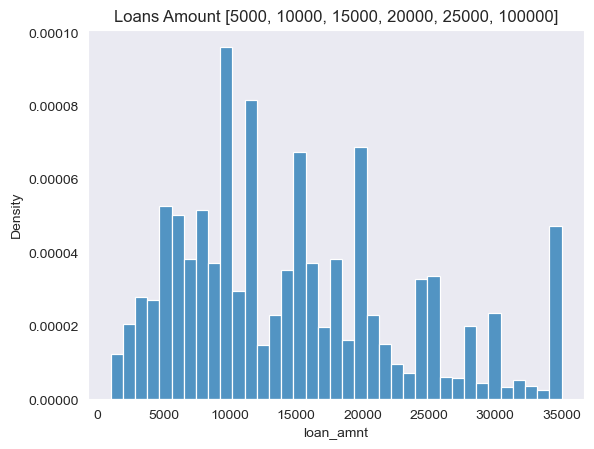

In [45]:
sns.histplot(data=df,x="loan_amnt",stat="density").set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount [5000, 10000, 15000, 20000, 25000, 100000]')]

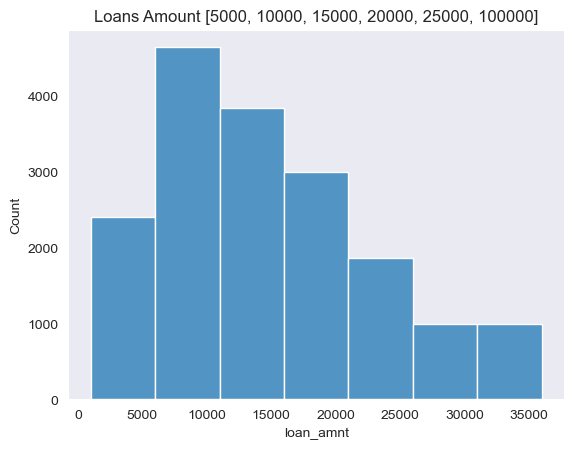

In [44]:
binwidth = 5000
sns.histplot(data=df,x="loan_amnt",binwidth=binwidth).set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount ')]

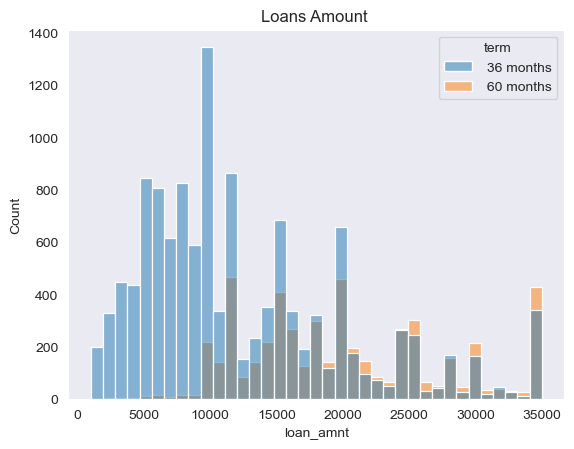

In [46]:
sns.histplot(data=df,x="loan_amnt",hue="term").set(title=f'Loans Amount ')

[Text(0.5, 1.0, 'Loans Amount ')]

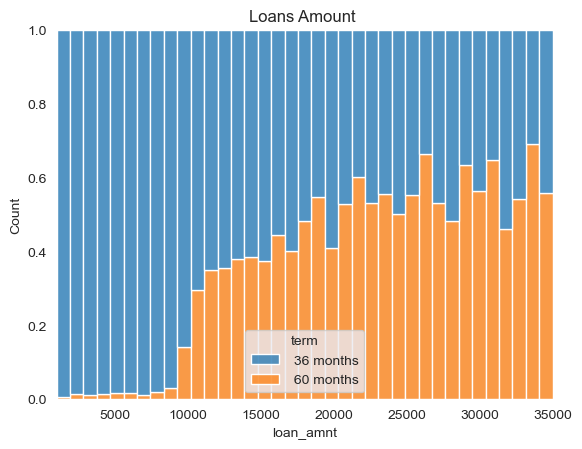

In [48]:
sns.histplot(data=df,x="loan_amnt",hue="term",multiple="fill").set(title=f'Loans Amount ')

In [67]:
#sns.histplot(data=df,x="grade",y="annual_inc",cbar="true").set(title=f'Loans Amount '#)

# Line (RELPLOT)

In [93]:
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%Y')

count_df = df.groupby('issue_d').size().reset_index(name='count')
sns.relplot(x='issue_d', 
             y= 'count', data=count_df,
            kind='line')

ValueError: Could not interpret value `term` for parameter `hue`

<AxesSubplot: xlabel='term', ylabel='home_ownership'>

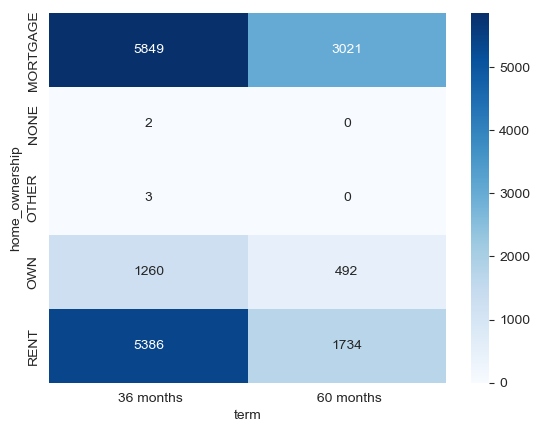

In [74]:
heatmap_data = df.pivot_table(index='home_ownership', columns='term', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')


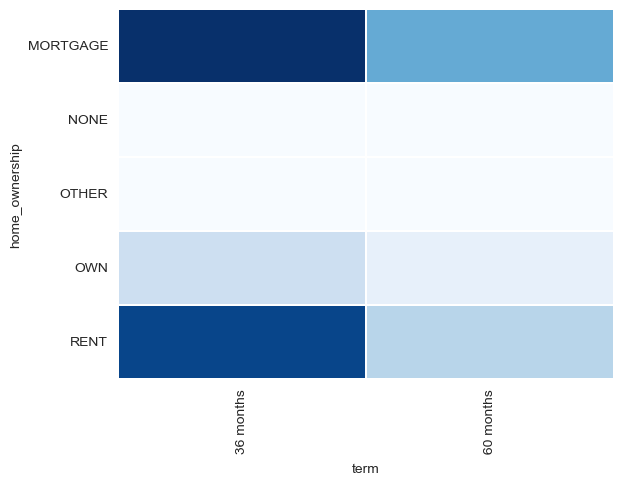

<Figure size 640x480 with 0 Axes>

In [118]:
ct = pd.crosstab(df["home_ownership"], df["term"])

sns.heatmap(ct, cbar=False, cmap="Blues", linewidths=.3)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Show the plot
plt.show()
plt.clf()

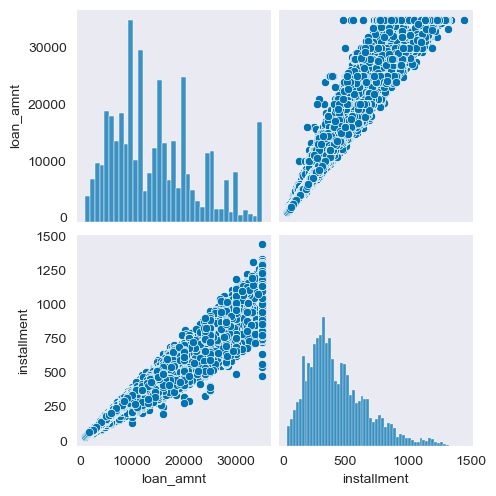

In [82]:
corr_df = df[['loan_amnt','installment']]
sns.pairplot(corr_df)

# Facet Grid

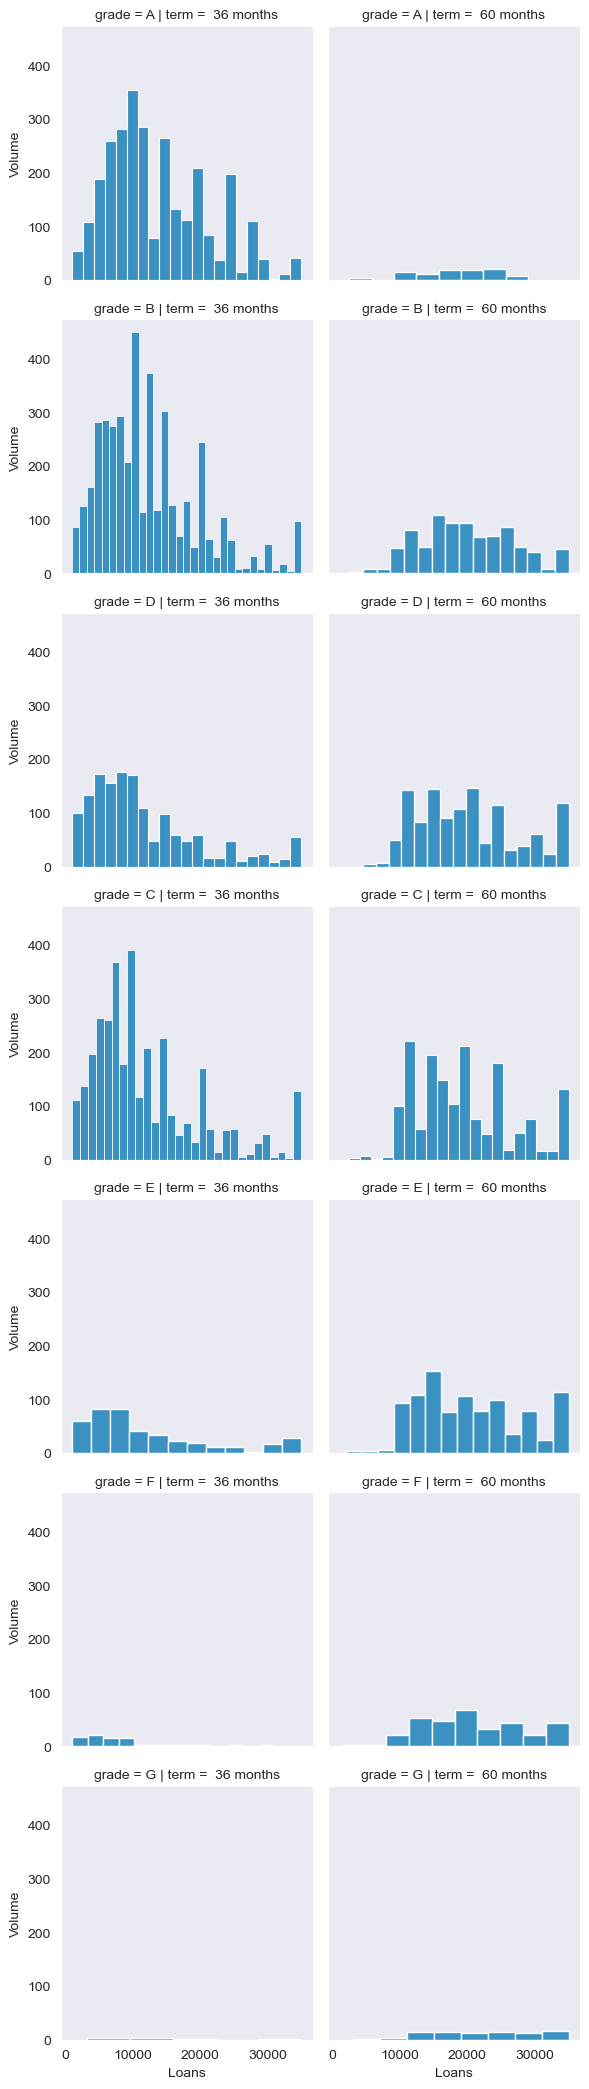

In [91]:
fg = sns.FacetGrid(df,col="term",row="grade")
fg.map(sns.histplot,"loan_amnt")
fg.set_axis_labels("Loans","Volume")


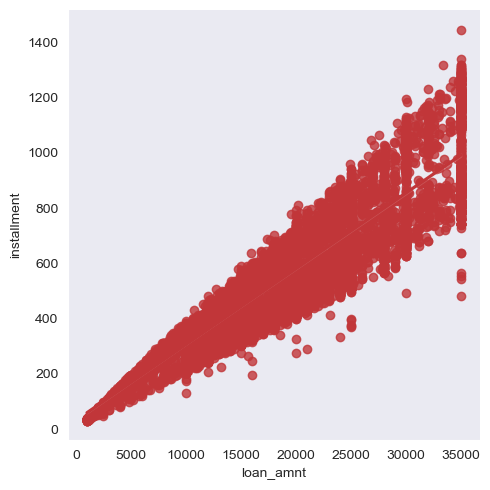

In [119]:
sns.lmplot(data=df,x="loan_amnt",y="installment")